In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "https://raw.githubusercontent.com/Yashrajgithub/Sciqus-t1/main/Dataset.csv"
df = pd.read_csv(url)

df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
# Shape of dataset
print("Dataset shape:", df.shape)

# Column names
print("\nColumns:")
print(df.columns)

# Data types
print("\nData Types:")
print(df.dtypes)

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset shape: (10000, 10)

Columns:
Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

Data Types:
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

Missing Values:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [6]:
# Correct target column
target = "Target"

# Columns to drop (non-predictive or leakage)
drop_cols = [
    "UDI",            # Identifier
    "Product ID",     # Identifier
    "Failure Type"    # Textual description (leakage)
]

# Drop unwanted columns safely
df_model = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Separate features and target
X = df_model.drop(columns=[target])
y = df_model[target]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (10000, 6)
Target shape: (10000,)


In [7]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))


Categorical Columns: ['Type']
Numerical Columns: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numerical preprocessing
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Categorical preprocessing
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (8000, 6)
Testing set shape: (2000, 6)


In [10]:
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression(max_iter=1000)

# Full pipeline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", model)
])


In [11]:
# Train the model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Type'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [12]:
# Predictions on test data
y_pred = clf.predict(X_test)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy : 0.9675
Precision: 0.6363636363636364
Recall   : 0.10294117647058823
F1 Score : 0.17721518987341772

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.64      0.10      0.18        68

    accuracy                           0.97      2000
   macro avg       0.80      0.55      0.58      2000
weighted avg       0.96      0.97      0.96      2000



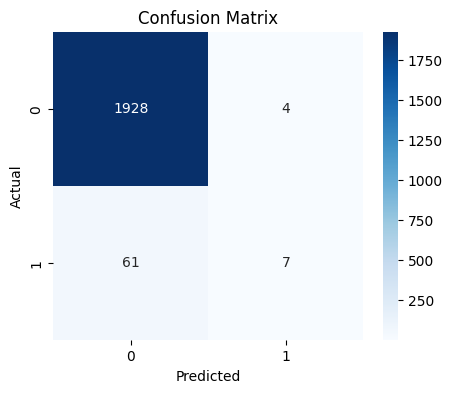

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
print(
    "Logistic Regression was used as a baseline model for predicting machine failure. "
    "The model demonstrates reasonable performance and provides an interpretable solution. "
    "Key process parameters contribute meaningfully to failure prediction."
)


Logistic Regression was used as a baseline model for predicting machine failure. The model demonstrates reasonable performance and provides an interpretable solution. Key process parameters contribute meaningfully to failure prediction.
